In [1]:
# 버스정류장 수 대비 유동량 비교

import pandas as pd
born = pd.read_csv('법정동_데이터셋.csv',sep = ',', encoding = 'UTF-8')
born
import warnings
warnings.filterwarnings('ignore')

In [2]:
born.columns

Index(['법정동', '법정동코드', '택스_승차합', '택시_하차합', 'BUS_정류장_개수', 'BUS_탑승', 'BUS_하차',
       'BUS_환승', '고령인구 발생량', '고령인구 도착량', '교통유동량', '버스혼잡도'],
      dtype='object')

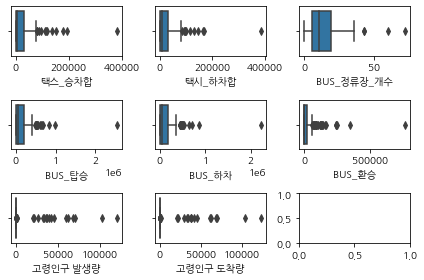

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

x = born[['택스_승차합', '택시_하차합', 'BUS_정류장_개수',
         'BUS_탑승','BUS_하차','BUS_환승', '고령인구 발생량', '고령인구 도착량']]

names = list(x.columns)
fig, axes = plt.subplots(round(len(names)/3), 3) 
y = 0;
for name in names:
    i, j = divmod(y, 3) 
    sns.boxplot(x=x[name], ax=axes[i, j])
    y = y + 1
plt.tight_layout()
plt.show()

In [4]:
Bus_stop = x['BUS_정류장_개수']
data = x.drop('BUS_정류장_개수',axis = 1)
data

,택스_승차합,택시_하차합,BUS_탑승,BUS_하차,BUS_환승,고령인구 발생량,고령인구 도착량
0,10407,8604,534244,443947,239119,886,1018
1,16079,14672,109486,90610,22056,391,102
2,6181,6680,52783,45757,5595,50,4
3,9901,12841,39214,32618,1133,28,7
4,32633,35952,181248,168749,10920,218,32
...,...,...,...,...,...,...,...
172,0,0,0,0,0,0,0
173,0,0,0,0,0,0,0
174,24,138,898,612,3,1,0
175,45,225,2525,1997,5,1,0


In [5]:
from sklearn.preprocessing import StandardScaler
features = ['택스_승차합', '택시_하차합', 'BUS_탑승', 'BUS_하차', 'BUS_환승','고령인구 발생량', '고령인구 도착량']

for a in features:
    Q1 = data[a].quantile(0.25)
    Q3 = data[a].quantile(0.75)
    IQR = Q3-Q1

outlier_index = data[ (data[a]<Q1-1.5*IQR) | (data[a]>Q3+1.5*IQR) ].index
data.drop(outlier_index, inplace=True)
scaler = StandardScaler()
scaler.fit(data)
data1 = scaler.transform(data)
data1.shape                                     

(143, 7)

In [6]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(linkage = 'ward')
agg = hc.fit_predict(data1)
print(agg)
#자동으로 계층분류

[1 1 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [7]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
S_score = silhouette_score(data1,agg)
C_score = calinski_harabasz_score(data1,agg)
print("{:.5f}".format(S_score))
print("{:.5f}".format(C_score))

0.63290
152.95738


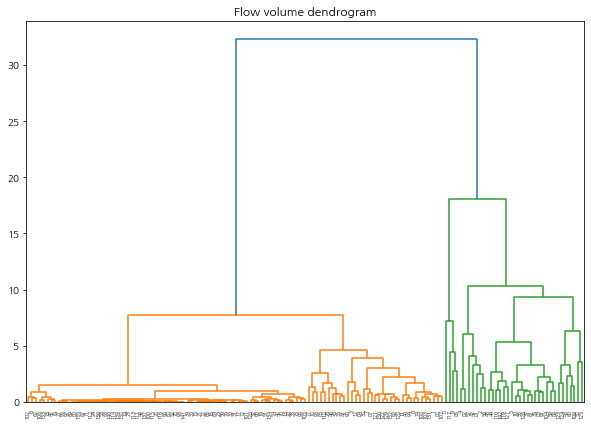

In [8]:
# from scipy.cluster.hierarchy import linkage
# from scipy.cluster.hierarchy import dendrogram
# hc = linkage(X_stand, method = 'ward')
# plt.figure(figsize =(10,10))
# plt.xlabel('index')
# plt.ylabel('distance')
# dendrogram(hc)
# plt.show()

#계층 분석
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Flow volume dendrogram")
dend = shc.dendrogram(shc.linkage(data1,method = 'ward'))
# -> 군집의 특성을 봤을 때 3군집 그 이상은 별 차이 없을 듯.

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',linkage = 'ward')
cluster.fit_predict(data1)
#값을 넣고 군집분석

array([1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [24]:
#0 번 군집의 데이터들의 버스정류장 수
[x for x,y in zip (Bus_stop,cluster.fit_predict(data1)) if y == 0]

[7,
 25,
 7,
 9,
 12,
 7,
 11,
 10,
 14,
 7,
 7,
 12,
 15,
 26,
 19,
 43,
 21,
 72,
 32,
 22,
 18,
 4,
 14,
 28,
 15,
 23,
 4,
 22,
 13,
 4,
 13,
 14]

In [25]:
#1번 군집의 데이터들의 버스정류장 수
[x for x,y in zip (Bus_stop,cluster.fit_predict(data1)) if y == 1]

[7,
 9,
 10,
 20,
 10,
 3,
 10,
 25,
 17,
 9,
 13,
 25,
 6,
 8,
 16,
 6,
 6,
 0,
 6,
 7,
 4,
 14,
 8,
 8,
 4,
 4,
 0,
 4,
 6,
 11,
 14,
 2,
 8,
 7,
 24,
 12,
 13,
 28,
 5,
 6,
 2,
 5,
 18,
 25,
 16,
 4,
 2,
 9,
 7,
 12,
 8,
 8,
 19,
 19,
 43,
 21,
 9,
 25,
 12,
 12,
 17,
 28,
 22,
 60,
 5,
 9,
 12,
 15,
 12,
 10,
 5,
 24,
 11,
 25,
 8,
 12,
 13,
 16,
 5,
 19,
 10,
 26,
 34,
 13,
 12,
 11,
 18,
 4,
 12,
 8,
 7,
 11,
 24,
 0,
 11,
 4,
 11,
 8,
 0,
 5,
 3,
 15,
 9,
 22,
 6,
 18,
 19]

In [26]:
[x for x,y in zip (Bus_stop,cluster.fit_predict(data1)) if y == 2]

[33, 13, 19, 35]

In [27]:
import numpy as np
np.mean([x for x,y in zip (Bus_stop,cluster.fit_predict(data1)) if y == 0])
# 0번 군집은 버스 정류장이 평균 18개

17.1875

In [28]:
np.mean([x for x,y in zip (Bus_stop,cluster.fit_predict(data1)) if y == 1])
# 1번 군집은 버스정류장이 평균 12개

12.336448598130842

In [29]:
np.mean([x for x,y in zip (Bus_stop,cluster.fit_predict(data1)) if y == 2])

25.0

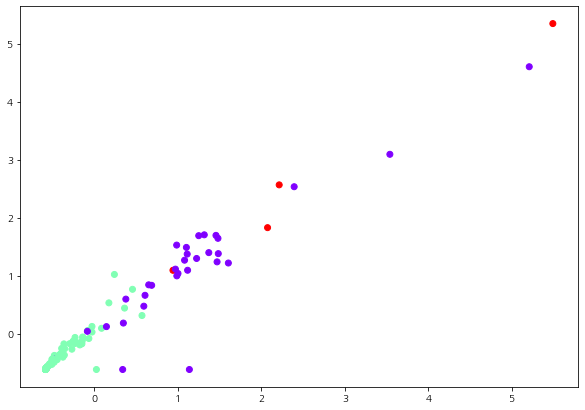

In [31]:
plt.figure(figsize = (10,7))
plt.scatter(data1[:,0],data1[:,1], c = cluster.labels_, cmap = 'rainbow')